## 1.0 Data Exploration 

In [1]:
import pandas as pd 
import numpy as np

WellProduction = pd.read_csv(r'C:\Users\ijeke\Documents\Datathon\WellProduction_subset.csv', parse_dates=['ProdPeriod'])

WellProduction.info()

print('\n')

WellProduction.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99337 entries, 0 to 99336
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        99337 non-null  int64         
 1   EPAssetsId        99337 non-null  int64         
 2   ProdPeriod        99337 non-null  datetime64[ns]
 3   ProdType          99337 non-null  object        
 4   Volume            99337 non-null  float64       
 5   WellHeader.Match  99337 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.5+ MB




,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume,WellHeader.Match
0,1670,2588946,2019-12-31,Production Hours,744.0,Yes
1,1694,2608797,2019-12-31,Production Hours,744.0,Yes
2,1760,2617557,2019-12-31,Production Hours,744.0,Yes
3,1769,2588149,2019-12-31,Production Hours,744.0,Yes
4,1773,2583451,2019-12-31,Production Hours,744.0,Yes


In [2]:
## check unique categorical values in the WellProduction data - WellHeader.Match
WellProduction['WellHeader.Match'].unique()

array(['Yes'], dtype=object)

In [3]:
## create two separate lists of columns to be dropped
dropcodes= ['WellHeader.Match']

##remove the columns based on lists above, and create new dataframe
WellProduction_data = WellProduction.drop(columns=(dropcodes), axis=1, inplace=False)

WellProduction_data.info()

print('\n')

WellProduction_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99337 entries, 0 to 99336
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  99337 non-null  int64         
 1   EPAssetsId  99337 non-null  int64         
 2   ProdPeriod  99337 non-null  datetime64[ns]
 3   ProdType    99337 non-null  object        
 4   Volume      99337 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.8+ MB




,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume
99332,960719,2600513,2019-11-30,Gas Production (MMcf),2.680393
99333,960723,2599246,2019-11-30,Gas Production (MMcf),55.168781
99334,960767,2595519,2019-11-30,Gas Production (MMcf),0.031783
99335,960775,2621053,2019-11-30,Gas Production (MMcf),0.031783
99336,960918,2600776,2019-11-30,Gas Production (MMcf),0.105944


In [4]:
##check if EPAssetsId is all unique, by counting number of unique values
uniqueEPAssetsId = WellProduction_data['EPAssetsId'].nunique()

print('Number of Unique EPAssetsId: ' + str(uniqueEPAssetsId) )

Number of Unique EPAssetsId: 1135


In [5]:
##check if Unamed column 0 is all unique, by counting number of unique values
unique_UnamedColumn0 = WellProduction_data.iloc[:, 0].nunique()

print('Number of Unique UnamedColumn0: ' + str(unique_UnamedColumn0) )

Number of Unique UnamedColumn0: 99337


In [6]:
## check unique categorical values in the WellProduction data - Prod Type
WellProduction_data['ProdType'].unique()


array(['Production Hours', 'Condensate Production (Bbls)',
       'Water Production (Bbls)', 'Oil Production (Bbls)',
       'Gas Production (MMcf)'], dtype=object)

## Add columns, change datatypes

In [7]:
## change ProdType data to categorical dtype

WellProduction_data = WellProduction_data.astype({'ProdType': 'category'})

print(WellProduction_data.dtypes)

Unnamed: 0             int64
EPAssetsId             int64
ProdPeriod    datetime64[ns]
ProdType            category
Volume               float64
dtype: object


In [8]:
## add year and month column to the well production data 

WellProduction_data['Year'] = WellProduction_data['ProdPeriod'].dt.year

WellProduction_data['Month'] = WellProduction_data['ProdPeriod'].dt.month

WellProduction_data.head(2)

,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month
0,1670,2588946,2019-12-31,Production Hours,744.0,2019,12
1,1694,2608797,2019-12-31,Production Hours,744.0,2019,12


In [9]:
## determine time period covered by the dataframe 

Timeperiod = WellProduction_data['Year'].unique()

print(sorted(Timeperiod))

[2015, 2016, 2017, 2018, 2019, 2020]


In [10]:
WellProduction_data.to_csv(r'C:\Users\ijeke\Documents\Datathon\Spotfire\Cleaned Data set\WellProduction_data.csv')

## Review an individual well to explore data better 


In [11]:
# check rows for unique EPAssetsId = 2600513

WellProduction_data[WellProduction_data['EPAssetsId']==2600513]


,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month
1343,14470,2600513,2019-08-31,Production Hours,744.000000,2019,8
1757,18753,2600513,2018-12-31,Production Hours,744.000000,2018,12
2178,23087,2600513,2019-05-31,Production Hours,744.000000,2019,5
3675,36116,2600513,2019-01-31,Production Hours,744.000000,2019,1
4402,42616,2600513,2018-10-31,Production Hours,744.000000,2018,10
...,...,...,...,...,...,...,...
94551,918755,2600513,2019-08-31,Gas Production (MMcf),3.082982,2019,8
95733,929307,2600513,2019-07-31,Gas Production (MMcf),2.690988,2019,7
96712,938458,2600513,2019-12-31,Gas Production (MMcf),3.030010,2019,12
98007,949640,2600513,2019-09-30,Gas Production (MMcf),1.239549,2019,9


In [12]:
#create subset of data using parameters EPAssetsID and ProdType
EPId = 2600513
prodtype = "Production Hours"

well_production_hours_foruniquewell = WellProduction_data[(WellProduction_data['EPAssetsId']==EPId) & (WellProduction_data['ProdType']==prodtype)].sort_values(by='ProdPeriod')

# check head for subset of data
well_production_hours_foruniquewell.head()


,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month
16853,194361,2600513,2017-03-31,Production Hours,120.0,2017,3
16637,192166,2600513,2017-04-30,Production Hours,576.0,2017,4
7612,79266,2600513,2017-05-31,Production Hours,720.0,2017,5
8618,88164,2600513,2017-06-30,Production Hours,720.0,2017,6
5879,60216,2600513,2017-07-31,Production Hours,744.0,2017,7


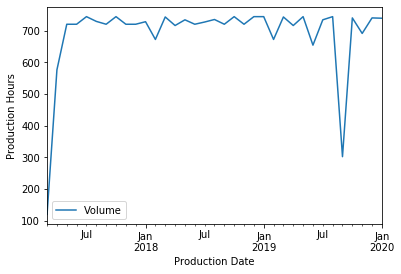

In [13]:
## create line chart for EPAssetsId = 2600513

import matplotlib.pyplot as plt

# plot line for subset of data
well_production_hours_foruniquewell.plot(x = 'ProdPeriod', y = 'Volume', kind='line')
plt.xlabel('Production Date')
plt.ylabel('Production Hours')

plt.show()

## Explore data in wide format, and review missing data

In [14]:
## unpivot WellProduction data - Prod Type/Volume (from Long format to wide format)
##pivot_columns = list(WellProduction_data['ProdType'].unique())

##also replace empty values with zero to indicate no production

WellProduction_pivot1 = WellProduction_data.pivot_table(index=['EPAssetsId', 'ProdPeriod'], columns='ProdType', values='Volume')

WellProduction_pivot1.head()


ProdType               Condensate Production (Bbls)  Gas Production (MMcf)  \
EPAssetsId ProdPeriod                                                        
2225574    2015-03-31                           NaN               6.222468   
           2015-04-30                           NaN               5.615053   
           2015-05-31                           NaN               7.892858   
           2015-06-30                           NaN               5.717466   
           2015-07-31                           NaN               3.107702   

ProdType               Oil Production (Bbls)  Production Hours  \
EPAssetsId ProdPeriod                                            
2225574    2015-03-31             5027.43714             150.0   
           2015-04-30             3049.92402             467.0   
           2015-05-31             5304.18834             740.0   
           2015-06-30             4863.90234             408.0   
           2015-07-31             3936.15684             314.0   

ProdType               Water Production (Bbls)  
EPAssetsId ProdPeriod                           
2225574    2015-03-31                      NaN  
           2015-04-30                      NaN  
           2015-05-31               7938.98556  
           2015-06-30              10258.66380  
           2015-07-31              11344.28328

In [15]:
WellProduction_pivot1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29450 entries, (2225574, Timestamp('2015-03-31 00:00:00')) to (2625908, Timestamp('2020-01-31 00:00:00'))
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  1431 non-null   float64
 1   Gas Production (MMcf)         29388 non-null  float64
 2   Oil Production (Bbls)         25517 non-null  float64
 3   Production Hours              29329 non-null  float64
 4   Water Production (Bbls)       13672 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


In [16]:
display(WellProduction_pivot1[WellProduction_pivot1['Production Hours'].isnull()])

ProdType               Condensate Production (Bbls)  Gas Production (MMcf)  \
EPAssetsId ProdPeriod                                                        
2616500    2019-10-31                           NaN               4.456728   
           2019-11-30                           NaN               3.146549   
           2019-12-31                           NaN               8.532056   
           2020-01-31                           NaN               8.570902   
2616514    2019-10-31                           NaN               4.477917   
...                                             ...                    ...   
2622477    2019-11-30                      270.4614             130.096192   
           2019-12-31                           NaN             324.271088   
           2020-01-31                           NaN             301.803812   
2623479    2019-12-31                           NaN             174.423329   
           2020-01-31                           NaN             146.372783   

ProdType               Oil Production (Bbls)  Production Hours  \
EPAssetsId ProdPeriod                                            
2616500    2019-10-31             5730.63678               NaN   
           2019-11-30             3635.50440               NaN   
           2019-12-31             3434.23080               NaN   
           2020-01-31             3261.26130               NaN   
2616514    2019-10-31             5730.00780               NaN   
...                                      ...               ...   
2622477    2019-11-30                    NaN               NaN   
           2019-12-31                    NaN               NaN   
           2020-01-31                    NaN               NaN   
2623479    2019-12-31                    NaN               NaN   
           2020-01-31                    NaN               NaN   

ProdType               Water Production (Bbls)  
EPAssetsId ProdPeriod                           
2616500    2019-10-31                      NaN  
           2019-11-30                      NaN  
           2019-12-31                      NaN  
           2020-01-31                      NaN  
2616514    2019-10-31                      NaN  
...                                        ...  
2622477    2019-11-30                      NaN  
           2019-12-31                      NaN  
           2020-01-31                      NaN  
2623479    2019-12-31               5072.09472  
           2020-01-31               2769.39894  

[121 rows x 5 columns]

## determine list of EPAssetsId with missing production hours data 

In [17]:
## create subset of data with only Production Hours
WellProductionHours = WellProduction_data[WellProduction_data['ProdType'] == 'Production Hours']

display(WellProductionHours.head())

## find out which wells have null production hours and create a list.
WellProduction_isnull = WellProductionHours[WellProductionHours['Volume'].isnull()]

print(WellProduction_isnull.head())

Well_with_nullproductionhours = WellProduction_isnull['EPAssetsId'].unique()

print(Well_with_nullproductionhours)

,Unnamed: 0,EPAssetsId,ProdPeriod,ProdType,Volume,Year,Month
0,1670,2588946,2019-12-31,Production Hours,744.0,2019,12
1,1694,2608797,2019-12-31,Production Hours,744.0,2019,12
2,1760,2617557,2019-12-31,Production Hours,744.0,2019,12
3,1769,2588149,2019-12-31,Production Hours,744.0,2019,12
4,1773,2583451,2019-12-31,Production Hours,744.0,2019,12


Empty DataFrame
Columns: [Unnamed: 0, EPAssetsId, ProdPeriod, ProdType, Volume, Year, Month]
Index: []
[]


#### Empty list of wells above tells me that production hours was not recorded for some wells.

## 2.0 Transform Data

In [18]:
## unpivot WellProduction data - Prod Type/Volume (from Long format to wide format)
##pivot_columns = list(WellProduction_data['ProdType'].unique())

##also replace empty values with zero to indicate no production

WellProduction_pivot = WellProduction_data.pivot_table(index=['EPAssetsId', 'Year', 'Month', 'ProdPeriod'], columns='ProdType', values='Volume', fill_value=0, observed=True)

WellProduction_pivot.head()


ProdType                          Condensate Production (Bbls)  \
EPAssetsId Year Month ProdPeriod                                 
2225574    2015 3     2015-03-31                           0.0   
                4     2015-04-30                           0.0   
                5     2015-05-31                           0.0   
                6     2015-06-30                           0.0   
                7     2015-07-31                           0.0   

ProdType                          Gas Production (MMcf)  \
EPAssetsId Year Month ProdPeriod                          
2225574    2015 3     2015-03-31               6.222468   
                4     2015-04-30               5.615053   
                5     2015-05-31               7.892858   
                6     2015-06-30               5.717466   
                7     2015-07-31               3.107702   

ProdType                          Oil Production (Bbls)  Production Hours  \
EPAssetsId Year Month ProdPeriod                                            
2225574    2015 3     2015-03-31             5027.43714               150   
                4     2015-04-30             3049.92402               467   
                5     2015-05-31             5304.18834               740   
                6     2015-06-30             4863.90234               408   
                7     2015-07-31             3936.15684               314   

ProdType                          Water Production (Bbls)  
EPAssetsId Year Month ProdPeriod                           
2225574    2015 3     2015-03-31                  0.00000  
                4     2015-04-30                  0.00000  
                5     2015-05-31               7938.98556  
                6     2015-06-30              10258.66380  
                7     2015-07-31              11344.28328

In [19]:
WellProduction_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29450 entries, (2225574, 2015, 3, Timestamp('2015-03-31 00:00:00')) to (2625908, 2020, 1, Timestamp('2020-01-31 00:00:00'))
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  29450 non-null  float64
 1   Gas Production (MMcf)         29450 non-null  float64
 2   Oil Production (Bbls)         29450 non-null  float64
 3   Production Hours              29450 non-null  int64  
 4   Water Production (Bbls)       29450 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.3 MB


In [20]:
## review dataset statistics 
WellProduction_pivot.describe()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
count,29450.000000,29450.000000,29450.000000,29450.000000,29450.000000
mean,19.466173,10.750491,1544.410883,677.474261,512.261239
std,218.738853,21.714365,1946.889294,133.219504,1918.753109
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.076510,378.645960,686.000000,0.000000
50%,0.000000,4.442602,951.017760,720.000000,0.000000
75%,0.000000,10.823986,2004.559260,744.000000,159.131940
max,16750.366380,608.495193,32998.177740,744.000000,53754.517740


## Determine annual production for each well 

In [21]:
## create pivot table for annual production for each well
WellProduction_annual = WellProduction_data.pivot_table(index=['EPAssetsId', 'Year'], columns='ProdType', values='Volume', aggfunc=np.sum, fill_value=0, observed=True)

WellProduction_annual.head(12)

ProdType         Condensate Production (Bbls)  Gas Production (MMcf)  \
EPAssetsId Year                                                        
2225574    2015                       0.00000              52.184680   
           2016                       0.00000              82.255232   
           2017                       0.00000              47.685574   
           2018                       0.00000             136.064393   
           2019                       0.00000              18.278940   
           2020                       0.00000               0.999409   
2575232    2015                    2761.85118             397.831816   
           2016                    5157.63600             225.534439   
           2017                    3410.95854             154.311550   
           2018                    2134.12914             113.720719   
           2019                       0.00000              94.177509   
           2020                       0.00000               8.457895   

ProdType         Oil Production (Bbls)  Production Hours  \
EPAssetsId Year                                            
2225574    2015            42504.58146              4519   
           2016            35626.68516              6291   
           2017            23743.99500              8223   
           2018            17503.25544              8759   
           2019             5990.40552              7656   
           2020              612.62652               744   
2575232    2015                0.00000              7342   
           2016                0.00000              8751   
           2017                0.00000              8670   
           2018                0.00000              8065   
           2019                0.00000              7648   
           2020                0.00000               744   

ProdType         Water Production (Bbls)  
EPAssetsId Year                           
2225574    2015              77620.53486  
           2016             115170.01188  
           2017              73951.06554  
           2018              50519.04462  
           2019              56812.61850  
           2020               5645.72448  
2575232    2015                  0.00000  
           2016                542.80974  
           2017                514.50564  
           2018                379.27494  
           2019                291.21774  
           2020                 23.90124

In [22]:
WellProduction_annual.describe()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000
mean,141.865575,78.347426,11255.357711,4937.296956,3733.257480
std,1219.890390,181.600174,14073.606002,3545.271146,12551.854458
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.246597,670.492680,744.000000,0.000000
50%,0.000000,28.156490,6152.053380,6462.000000,20.127360
75%,0.000000,75.856190,16863.582780,8457.000000,1437.848280
max,32265.416040,4973.944789,123771.942360,8783.000000,177991.276320


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB754CAA08>,
      dtype=object)

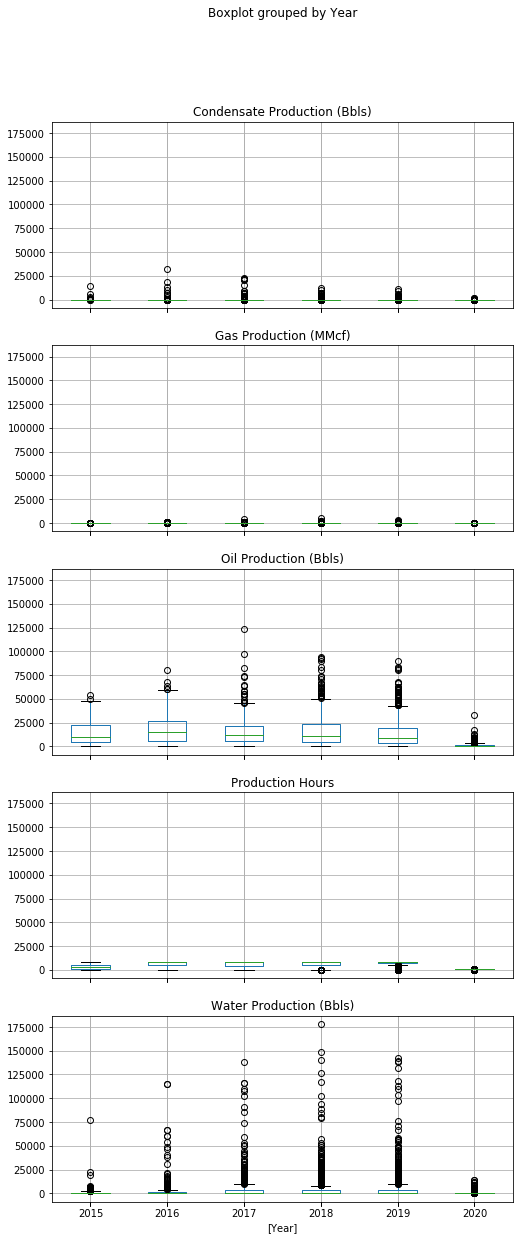

In [23]:
WellProduction_annual.boxplot(by='Year', layout= (5,1),figsize=(8,20))

## Determine Total Production hours  and Volumes for each well


In [24]:
## create dataframe for total production hours for each well from 2015 to 2020

WellProduction_TotalHours_Volume = WellProduction_data.pivot_table(index=['EPAssetsId'], columns='ProdType', values='Volume', aggfunc=np.sum, fill_value=0, observed=True)

WellProduction_TotalHours_Volume.head(10)

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
2225574,0.00000,337.468229,125981.54910,36192,379718.99988
2575232,13464.57486,994.033927,0.00000,41220,1751.70930
2576573,0.00000,250.388995,85518.63672,35603,1905.80940
2577895,0.00000,428.266111,12234.91896,42227,218.25606
2578937,0.00000,315.784942,35505.92100,35350,0.00000
2578939,0.00000,364.579401,57242.84082,40430,9885.67866
2579782,0.00000,203.671046,24479.27262,40155,0.00000
2579783,0.00000,233.091806,14785.43286,42008,0.00000
2579784,0.00000,294.260571,21992.91468,40755,0.00000


In [25]:
## review statistics 

WellProduction_TotalHours_Volume.describe()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,505.091444,278.944449,40073.040097,17578.517181,13291.712314
std,3126.778594,493.537399,32479.055479,11530.931379,37132.726272
min,0.000000,0.017657,0.000000,0.000000,0.000000
25%,0.000000,68.150501,15378.246510,8266.000000,0.000000
50%,0.000000,138.243316,35792.735880,16104.000000,1590.690420
75%,0.000000,287.121684,57287.183910,25543.000000,10056.446730
max,48966.721980,9048.831274,190184.682600,43285.000000,403943.535600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB76C8FF08>,
      dtype=object)

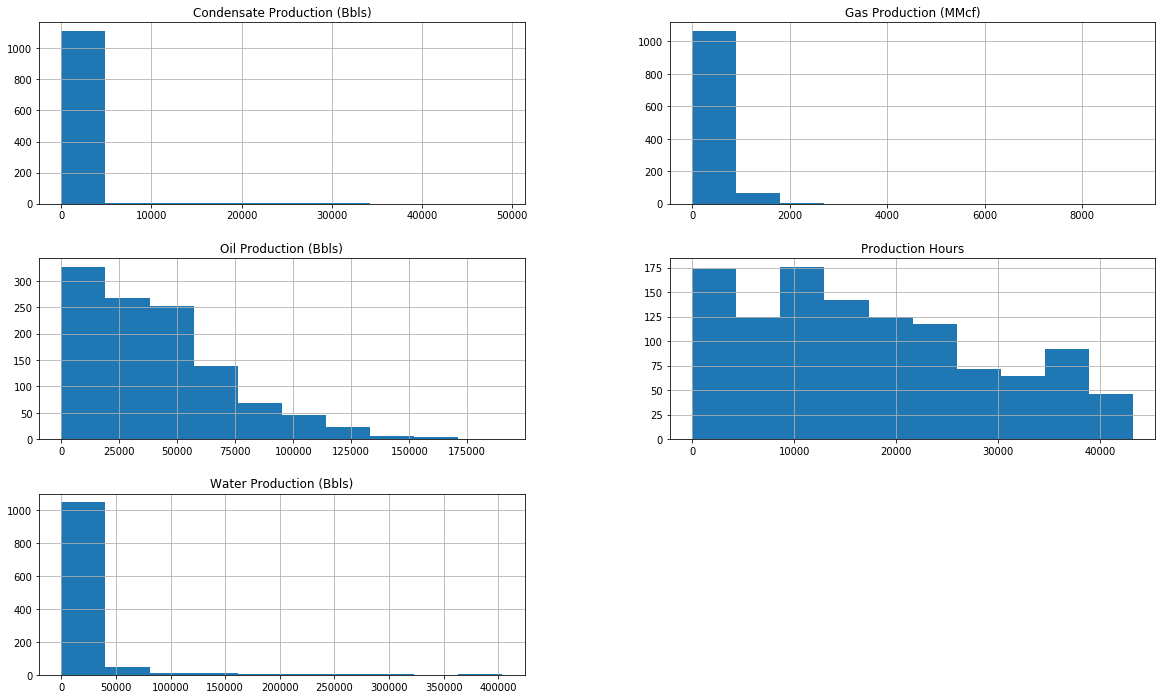

In [30]:
## Create Histogram of Production Hours

WellProduction_TotalHours_Volume.hist(figsize=(20,12))

## 3.0 Create functions to analyze the data 